In [32]:
import os
import sys
sys.path.append('../')
from settings import PROJECT_ROOT

import pandas as pd
import qgrid

import numpy as np 

%matplotlib inline
# import matplotlib as plt
from matplotlib import pyplot as plt

import seaborn as sns

from scipy import stats

import plotly
import credentials
plotly.tools.set_credentials_file(username='Qb1t', api_key=credentials.plotly_api_key)
import plotly.plotly as py
%load_ext autoreload
%autoreload 1


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
filename = 'file_test.csv'
data_path = os.path.join(PROJECT_ROOT, 'data', filename)
df = pd.read_csv(data_path, index_col=0)
qgrid = qgrid.show_grid(df,show_toolbar=True)

In [3]:
qgrid


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [13]:
qgrid

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [10]:
changed_df = qgrid.get_changed_df()

DATA FRAME PREPROCESSING

In [15]:
df.describe()

,y
count,2.000000
mean,0.500000
std,0.707107
min,0.000000
25%,0.250000
50%,0.500000
75%,0.750000
max,1.000000


In [4]:
df.info

<bound method DataFrame.info of        x  y
0  'ale'  1
1  'ehg'  0>

In [ ]:
df.replace("?", np.nan, inplace = True)

In [14]:
df.dtypes

x    object
y     int64
dtype: object

In [17]:
missing_data = df.isnull()
missing_data

,x,y
0,False,False
1,False,False


In [ ]:
df.dfropna(subset=['column_name'], axis=0)


In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

REPLACE MISSING VALUE BY MEAN

In [ ]:
column_name = None 
avg_norm = df[column_name].astype("float").mean(axis=0)
print("Average of normalized-column_name:", avg_norm)
df[column_name].replace(np.nan, avg_norm, inplace=True)

REPLACE MISSING VALUE BY MOST FREQUENT ELEMENT 


In [24]:
most_freq_el = df[column_name].value_counts().idxmax()
print("most freq el in {}: {}".format(column_name, most_freq_el))
df[column_name].replace(np.nan, most_freq_el, inplace=True)

most freq el in x: 'ale'


NORMALIZATION


In [ ]:
# simple feature scalling
df[column_name] = df[column_name]/df[column_name].max()
# MIN-Max scaling
df[column_name] = (df[column_name] - df[column_name].min()) / 
                (df[column_name].max() - df[column_name].min())
# Z-score
df[column_name] = (df[column_name] - df[column_name].mean()) / 
                 df[column_name].std()

BINNING


In [ ]:
df[column_name]=df[column_name].astype(int, copy=True)
plt.pyplot.hist(df[column_name])
# set x/y labels and plot title
plt.pyplot.xlabel(column_name)
plt.pyplot.ylabel("count")
plt.pyplot.title("{} bins".format(column_name))

In [30]:
bins = np.linspace(min(df[column_name]), max(df[column_name]), 4)
group_names = ['Low', 'Medium', 'High']
binned_column_name = '{}-binned'.format(column_name) 
df[] = pd.cut(df[column_name], bins, labels=group_names, include_lowest=True)
pyplot.bar(group_names, df[binned_column_name].value_counts())
# set x/y labels and plot title
plt.pyplot.xlabel(column_name)
plt.pyplot.ylabel("count")
plt.pyplot.title("{} bins".format(column_name))


TypeError: ufunc 'multiply' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

In [ ]:
GET ONE HOT ENCODING 


In [ ]:
dummy_variable_1 = pd.get_dummies(df[column_name])
dummy_variable_1.head()

In [ ]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)
df.drop(column_name, axis = 1, inplace=True)

EXPLORATORY DATA ANALYSIS


In [16]:
# df.describe()
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,196,196,196,196,196,196,196,196,196,196
unique,22,2,2,5,3,2,5,5,7,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,160,115,93,118,193,145,157,90,112


In [ ]:
df.corr()

In [35]:
column1_name = 'x'
column2_name = 'y'

In [ ]:
sns.regplot(x=column1_name, y=column2_name, data=df)
plt.ylim(0,)

In [ ]:
df[[column1_name, column2_name]]

In [ ]:
# VALUE COUNTS
# categorical variable name
categorical_column = 'c_n'
engine_loc_counts = df[categorical_column].value_counts().to_frame()
engine_loc_counts.rename(columns={categorical_column: 'value_counts'}, inplace=True)
engine_loc_counts.index.name = categorical_column 
# engine_loc_counts.head(10)

In [ ]:
# GROUP BY
# grouping results
cat_col1 = 'name1'
cat_col2 = 'name2'
cont_col = 'name3'
df_gptest = df[[cat_col1, cat_col2,cont_col]]
grouped_test1 = df_gptest.groupby([cat_col1, cat_col2],as_index=False).mean()
grouped_test1

In [ ]:
# PIVOT FORM
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

# grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
# grouped_pivot

In [ ]:
def compute_pearrson_corr(df, dependent_col)
    computed_p_coef_p_value_pairs = dict() 
    for column in df.columns:
        if column is not dependent_col:
            pearson_coef, p_value = stats.pearsonr(df[column], df[dependent_col])
            computed_p_coef_p_value_pairs[column] = (pearson, p_value)

In [ ]:
# ANALYSIS OF VARIANCE - ANOVA - for categorical variables
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 


Visualization


In [36]:
column1_name = 'column_1'
column2_name = 'column_2'

In [ ]:
sns.boxplot(x=column1_name, y=column2_name, data=df)


NameError: name 'grouped_pivot' is not defined

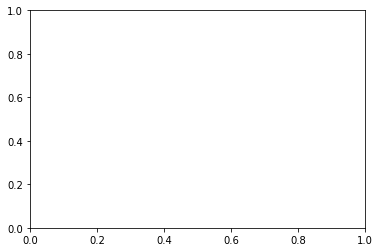

In [7]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

PCA 

In [34]:
from utils import random_color
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler
from utils import random_color

path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df = df.dropna()
X = df.select_dtypes(include=np.number).values
Y = df['body-style'].values
sklearn_pca = sklearnPCA(n_components=2)
X_std = StandardScaler().fit_transform(X)
Y_sklearn = sklearn_pca.fit_transform(X_std)
categories = np.unique(Y)
colors = dict()
for category in categories:
    colors[category] = random_color()
data = []

for category, color in colors.items():

    trace = dict(
        type='scatter',
        x=Y_sklearn[Y==category,0],
        y=Y_sklearn[Y==category,1],
        mode='markers',
        name=category,
        marker=dict(
            color=color,
            size=12,
            line=dict(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8)
    )
    data.append(trace)

layout = dict(
        xaxis=dict(title='PC1', showline=False),
        yaxis=dict(title='PC2', showline=False)
)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='pca-scikitlearn')

/home/michal/miniconda3/envs/nn2019/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

